<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Meal_Id      512 non-null    object
 1   Name         512 non-null    object
 2   catagory     512 non-null    object
 3   description  511 non-null    object
 4   Veg_Non      512 non-null    object
 5   Nutrient     512 non-null    object
 6   Disease      512 non-null    object
 7   Diet         512 non-null    object
 8   Price        512 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 36.1+ KB
None
    Meal_Id                        Name catagory  \
0  meal_id1         summer squash salad    salad   
1  meal_id2        chicken minced salad    salad   
2  meal_id3        sweet chilli almonds   chilli   
3  meal_id4             tricolour salad    salad   
4  meal_id5  gluten-free christmas cake     cake   

                                         description  Veg_Non   Nutrient  \


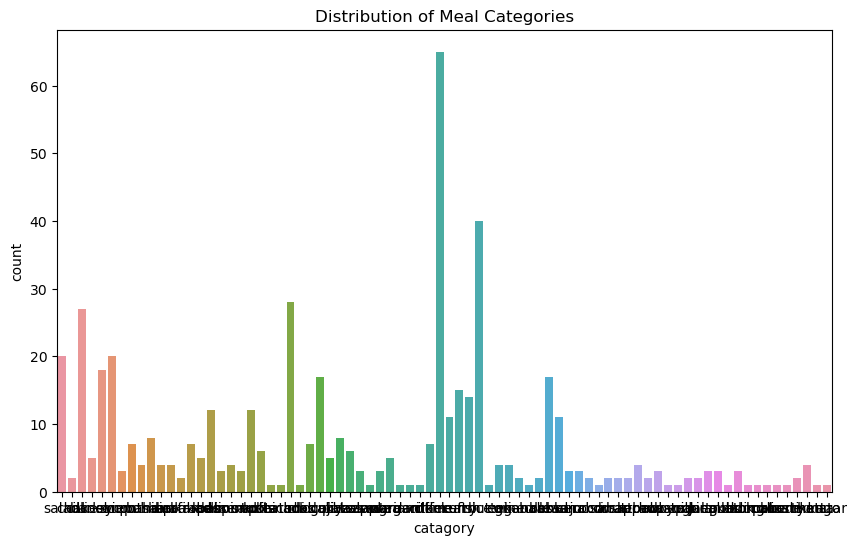

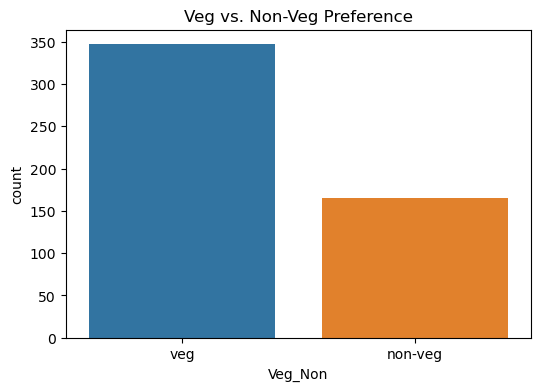

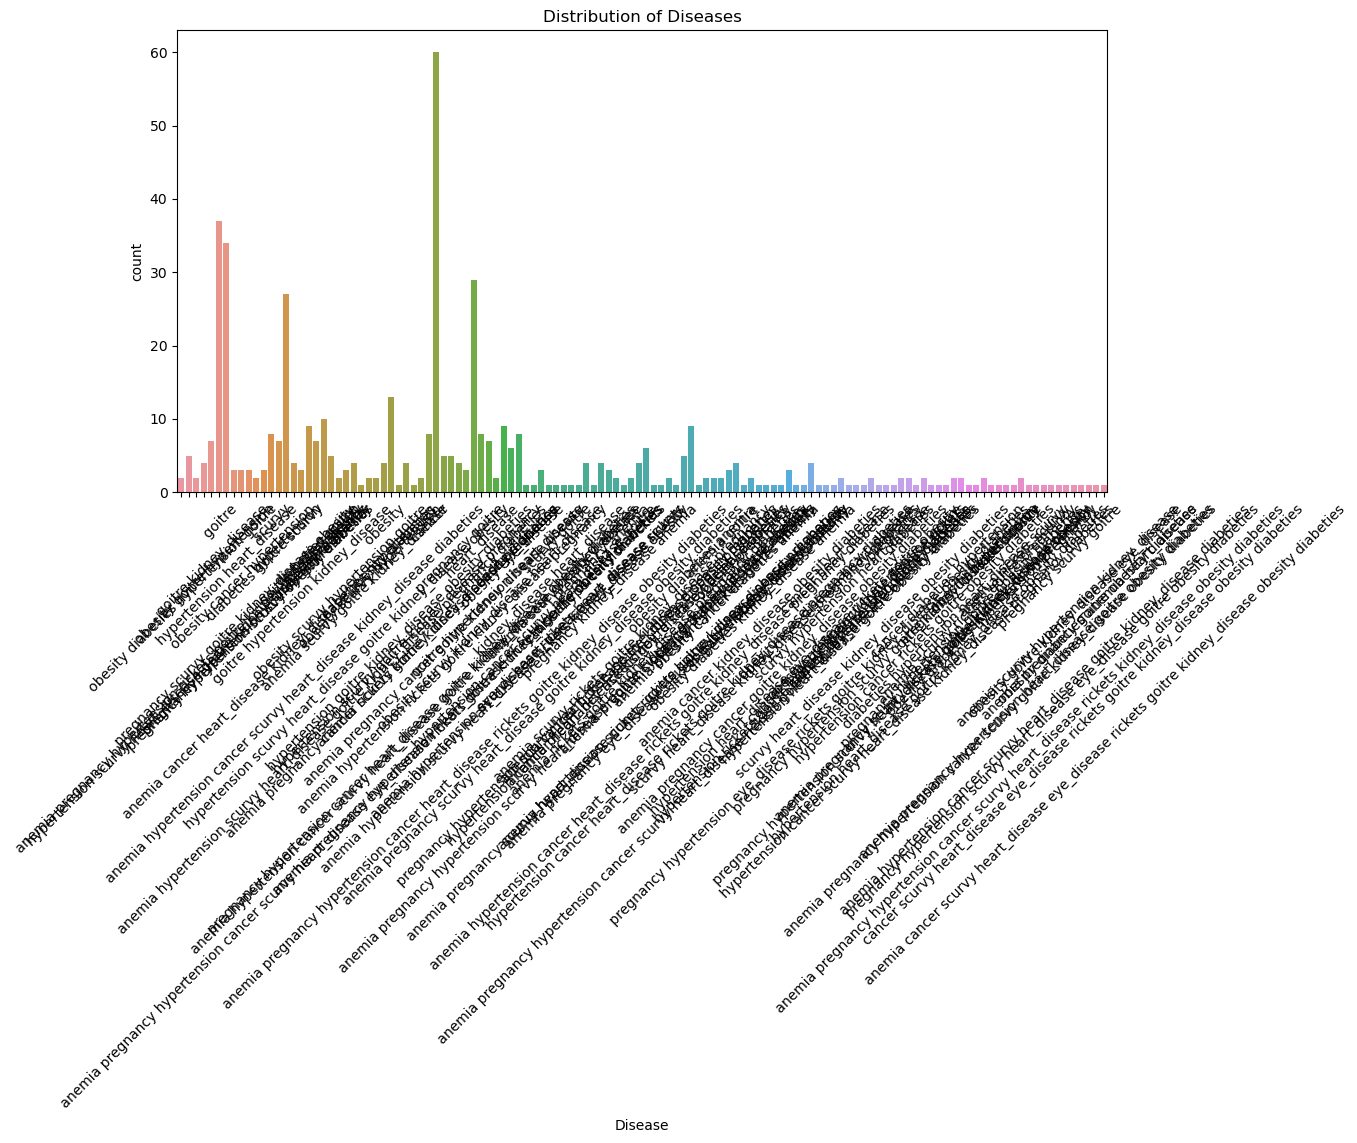

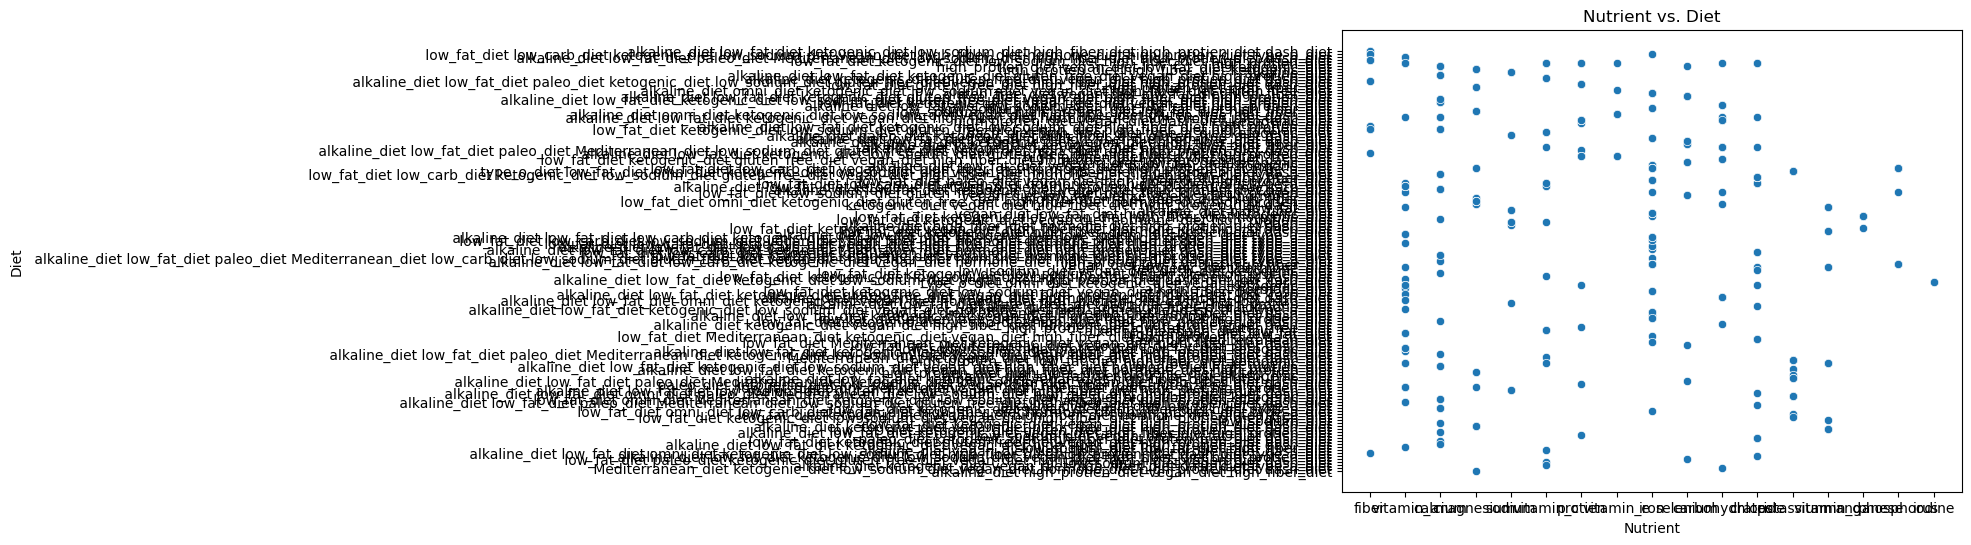

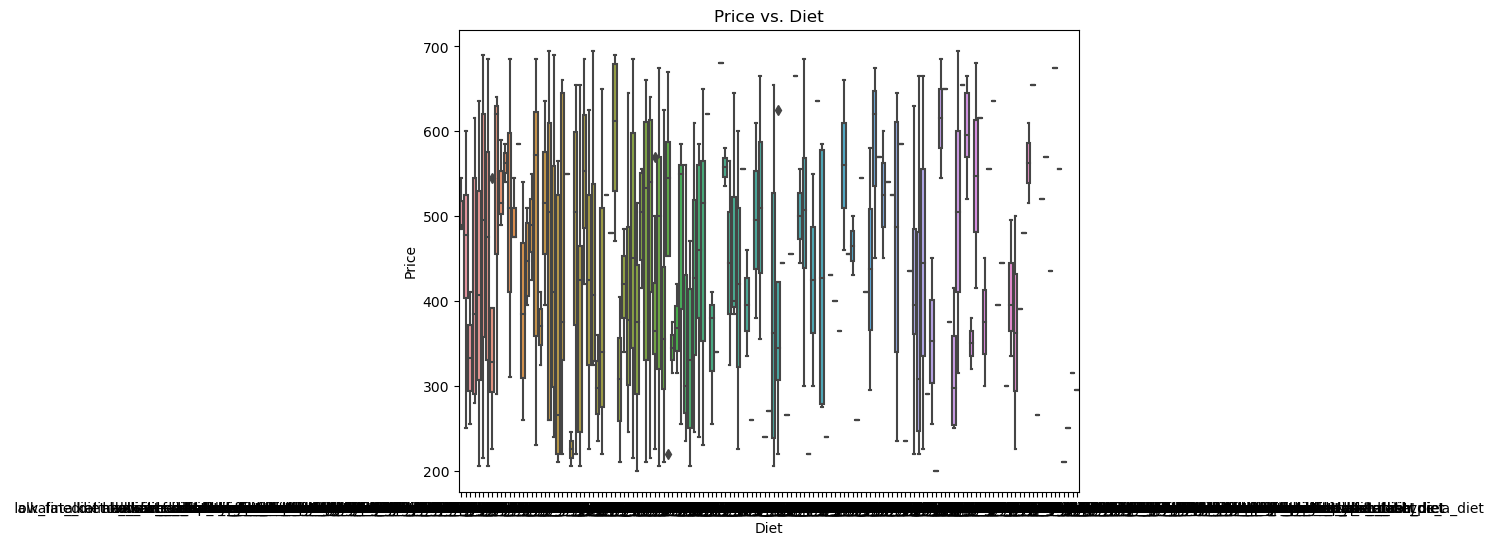

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score

# Load the dataset
df = pd.read_csv('dieasediff.csv')  # Replace 'your_dataset.csv' with the actual file path

# Display basic information about the dataset
print(df.info())

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Explore statistical summary of numerical columns
print(df.describe())

# Explore categorical columns
print(df['catagory'].value_counts())

# Visualize distribution of categories
plt.figure(figsize=(10, 6))
sns.countplot(x='catagory', data=df)
plt.title('Distribution of Meal Categories')
plt.show()

# Visualize distribution of Veg_Non preference
plt.figure(figsize=(6, 4))
sns.countplot(x='Veg_Non', data=df)
plt.title('Veg vs. Non-Veg Preference')
plt.show()

# Visualize distribution of diseases
plt.figure(figsize=(12, 6))
sns.countplot(x='Disease', data=df)
plt.title('Distribution of Diseases')
plt.xticks(rotation=45)
plt.show()

# Visualize relationship between Nutrient and Diet
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Nutrient', y='Diet', data=df)
plt.title('Nutrient vs. Diet')
plt.show()

# Visualize relationship between Price and Diet
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diet', y='Price', data=df)
plt.title('Price vs. Diet')
plt.show()


In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

df = pd.read_csv('dieasediff.csv')

X = df.drop(['Meal_Id', 'Name', 'description', 'Price'], axis=1)
y = df['Name']

X_encoded = pd.get_dummies(X, columns=['catagory', 'Disease', 'Diet', 'Nutrient'])
X_encoded['Veg_Non'] = X_encoded['Veg_Non'].map({'veg': 0, 'non-veg': 1})

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

tn= conf_matrix.ravel()
tp= conf_matrix.ravel()
fp= conf_matrix.ravel()
fn = conf_matrix.ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

cv_scores = cross_val_score(clf, X_encoded, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean():.2f}")


Accuracy: 0.32
Classification Report:
                                                           precision    recall  f1-score   support

                                    active charcoal modak       0.00      0.00      0.00         2
                                         al hachi chicken       1.00      1.00      1.00         1
                                almond and amaranth ladoo       0.00      0.00      0.00         0
                            almond and raw banana galawat       1.00      1.00      1.00         1
                                 amritsari chicken masala       0.00      0.00      0.00         1
                                  andhra crab meat masala       1.00      1.00      1.00         1
                                 andhra pan fried pomfret       1.00      1.00      1.00         2
                                              apple kheer       0.00      0.00      0.00         1
                                assorted rice kheer sushi       1.00  

c:\Users\abhay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abhay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abhay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abhay\anaconda3\Lib\site-packages\sklearn\metrics\_cla

Cross-Validation Scores: [0.41747573 0.46601942 0.51960784 0.51960784 0.5       ]
Mean Cross-Validation Score: 0.48


In [4]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

df = pd.read_csv('dieasediff.csv')

X = df.drop(['Meal_Id', 'Name', 'description', 'Price'], axis=1)
y = df['Name']

X_encoded = pd.get_dummies(X, columns=['catagory', 'Disease', 'Diet', 'Nutrient'])
X_encoded['Veg_Non'] = X_encoded['Veg_Non'].map({'veg': 0, 'non-veg': 1})

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)

svm_y_pred = svm_clf.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"SVM Accuracy: {svm_accuracy:.2f}")

print("SVM Classification Report:")
print(classification_report(y_test, svm_y_pred))

svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)
print("SVM Confusion Matrix:")
print(svm_conf_matrix)

tn_svm = svm_conf_matrix[0, 0]
fp_svm = svm_conf_matrix[0, 1]
fn_svm = svm_conf_matrix[1, 0]
tp_svm = svm_conf_matrix[1, 1]

print(f"SVM True Negatives: {tn_svm}")
print(f"SVM False Positives: {fp_svm}")
print(f"SVM False Negatives: {fn_svm}")
print(f"SVM True Positives: {tp_svm}")

svm_cv_scores = cross_val_score(svm_clf, X_encoded, y, cv=5)
print(f"SVM Cross-Validation Scores: {svm_cv_scores}")
print(f"Mean SVM Cross-Validation Score: {svm_cv_scores.mean():.2f}")


SVM Accuracy: 0.33
SVM Classification Report:
                                                precision    recall  f1-score   support

                         active charcoal modak       0.00      0.00      0.00         2
                              al hachi chicken       0.00      0.00      0.00         1
                 almond and raw banana galawat       1.00      1.00      1.00         1
                      amritsari chicken masala       0.00      0.00      0.00         1
                       andhra crab meat masala       1.00      1.00      1.00         1
                      andhra pan fried pomfret       1.00      1.00      1.00         2
                                   apple kheer       0.00      0.00      0.00         1
                     assorted rice kheer sushi       1.00      1.00      1.00         1
                            baked almond kofta       1.00      1.00      1.00         2
                      baked shankarpali recipe       1.00      1.00      

c:\Users\abhay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abhay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abhay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abhay\anaconda3\Lib\site-packages\sklearn\metrics\_cla

SVM Cross-Validation Scores: [0.40776699 0.47572816 0.5        0.51960784 0.48039216]
Mean SVM Cross-Validation Score: 0.48


In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

df = pd.read_csv('dieasediff.csv')

X = df.drop(['Meal_Id', 'Name', 'description', 'Price'], axis=1)
y = df['Name']

X_encoded = pd.get_dummies(X, columns=['catagory', 'Disease', 'Diet', 'Nutrient'])
X_encoded['Veg_Non'] = X_encoded['Veg_Non'].map({'veg': 0, 'non-veg': 1})

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

rf_y_pred = rf_clf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
print("Random Forest Confusion Matrix:")
print(rf_conf_matrix)

# Extract values from confusion matrix
tn_rf = rf_conf_matrix[0, 0]
fp_rf = rf_conf_matrix[0, 1]
fn_rf = rf_conf_matrix[1, 0]
tp_rf = rf_conf_matrix[1, 1]

print(f"Random Forest True Negatives: {tn_rf}")
print(f"Random Forest False Positives: {fp_rf}")
print(f"Random Forest False Negatives: {fn_rf}")
print(f"Random Forest True Positives: {tp_rf}")

rf_cv_scores = cross_val_score(rf_clf, X_encoded, y, cv=5)
print(f"Random Forest Cross-Validation Scores: {rf_cv_scores}")
print(f"Mean Random Forest Cross-Validation Score: {rf_cv_scores.mean():.2f}")


Random Forest Accuracy: 0.35
Random Forest Classification Report:
                                                            precision    recall  f1-score   support

                                     active charcoal modak       0.00      0.00      0.00         2
                                          al hachi chicken       1.00      1.00      1.00         1
                             almond and raw banana galawat       1.00      1.00      1.00         1
amaranthus granola with lemon yogurt, berries and marigold       0.00      0.00      0.00         0
                                  amritsari chicken masala       0.00      0.00      0.00         1
                                   andhra crab meat masala       1.00      1.00      1.00         1
                                  andhra pan fried pomfret       1.00      1.00      1.00         2
                                               apple kheer       0.00      0.00      0.00         1
                                 

c:\Users\abhay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abhay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abhay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abhay\anaconda3\Lib\site-packages\sklearn\metrics\_cla

Random Forest Cross-Validation Scores: [0.44660194 0.52427184 0.52941176 0.55882353 0.5       ]
Mean Random Forest Cross-Validation Score: 0.51


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df = pd.read_csv('dieasediff.csv')

X = df.drop(['Meal_Id', 'Name', 'description', 'Price'], axis=1)
y = df['Name']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_encoded = pd.get_dummies(X, columns=['catagory', 'Disease', 'Diet', 'Nutrient'])
X_encoded['Veg_Non'] = X_encoded['Veg_Non'].map({'veg': 0, 'non-veg': 1})

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ann_model = Sequential()

ann_model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
ann_model.add(Dense(units=32, activation='relu'))
ann_model.add(Dense(units=16, activation='relu'))

ann_model.add(Dense(units=len(label_encoder.classes_), activation='softmax'))

ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

ann_y_pred_prob = ann_model.predict(X_test_scaled)
ann_y_pred = [round(prob.argmax()) for prob in ann_y_pred_prob]

ann_y_pred_labels = label_encoder.inverse_transform(ann_y_pred)

conf_matrix_ann = confusion_matrix(y_test, ann_y_pred)
print("ANN Confusion Matrix:")
print(conf_matrix_ann)

tn_ann= conf_matrix_ann.ravel()
fp_ann= conf_matrix_ann.ravel()
fn_ann= conf_matrix_ann.ravel()
tp_ann = conf_matrix_ann.ravel()
print(f"ANN True Negatives: {tn_ann}")
print(f"ANN False Positives: {fp_ann}")
print(f"ANN False Negatives: {fn_ann}")
print(f"ANN True Positives: {tp_ann}")

ann_accuracy = accuracy_score(y_test, ann_y_pred)
print(f"ANN Accuracy: {ann_accuracy:.2f}")

print("ANN Classification Report:")
print(classification_report(y_test, ann_y_pred_labels))

ann_cv_scores = cross_val_score(ann_model, X_encoded, y_encoded, cv=5)
print(f"ANN Cross-Validation Scores: {ann_cv_scores}")
print(f"Mean ANN Cross-Validation Score: {ann_cv_scores.mean():.2f}")


Epoch 1/10
11/11 [==============================] - 2s 43ms/step - loss: 5.7309 - accuracy: 0.0031 - val_loss: 5.7268 - val_accuracy: 0.0000e+00
Epoch 2/10
11/11 [==============================] - 0s 8ms/step - loss: 5.6197 - accuracy: 0.0122 - val_loss: 5.6989 - val_accuracy: 0.0122
Epoch 3/10
11/11 [==============================] - 0s 8ms/step - loss: 5.5095 - accuracy: 0.0520 - val_loss: 5.6702 - val_accuracy: 0.0122
Epoch 4/10
11/11 [==============================] - 0s 10ms/step - loss: 5.3680 - accuracy: 0.0795 - val_loss: 5.6339 - val_accuracy: 0.0122
Epoch 5/10
11/11 [==============================] - 0s 12ms/step - loss: 5.1713 - accuracy: 0.0734 - val_loss: 5.5924 - val_accuracy: 0.0366
Epoch 6/10
11/11 [==============================] - 0s 10ms/step - loss: 4.9080 - accuracy: 0.1009 - val_loss: 5.5496 - val_accuracy: 0.0610
Epoch 7/10
11/11 [==============================] - 0s 7ms/step - loss: 4.5659 - accuracy: 0.1468 - val_loss: 5.4929 - val_accuracy: 0.0732
Epoch 8/10
1

ValueError: Mix of label input types (string and number)